In [194]:
import matplotlib.pyplot as plt 
import pandas as pd

In [195]:
data = pd.read_csv('../data/Chuvas/Chuvas21-25.csv')

In [196]:
data[['Posto', 'Mês/Ano', 'Acumulado']]

,Posto,Mês/Ano,Acumulado
0,Abreu e Lima,05/2021,8750.9
1,Araçoiaba (Granja Cristo Redentor),05/2021,5855.1
2,Cabo,05/2021,0.0
3,Cabo (Barragem de Gurjaú),05/2021,9366.8
4,Cabo (Barragem de Suape),05/2021,9539.9
...,...,...,...
1387,Paulista,04/2025,8190.9
1388,Recife (Alto da Brasileira),04/2025,8504.7
1389,Recife (Codecipe / Santo Amaro),04/2025,8354.5
1390,Recife (Várzea),04/2025,1410.2


In [197]:
def plot_monthly_city_rainfall(
    df: pd.DataFrame,
    month_year: str,
    top_n: int = 10,
    *,
    figsize: tuple = (10, 5)
):
    """
    Exibe o TOP-N de cidades com maior chuva acumulada em um mês específico.

    --------
    Parâmetros
    --------
    df : pd.DataFrame
        Deve conter as colunas:
            - 'Posto'      : nome da cidade/estação
            - 'Mês/Ano'    : string no formato 'MM/YYYY'
            - 'Acumulado'  : chuva acumulada em mm (numérica ou texto)
    month_year : str
        Mês/Ano no formato 'MM/YYYY', e.g. '06/2025'.
    top_n : int, opcional (padrão = 10)
        Quantidade de cidades a exibir.
    figsize : tuple, opcional
        Tamanho da figura em polegadas.

    --------
    Retorna
    --------
    matplotlib.figure.Figure
        Figura com gráfico de barras.
    """
    # Garante tipos corretos sem conversões pesadas
    df["Acumulado"] = pd.to_numeric(df["Acumulado"], errors="coerce")

    # --- Filtro rápido pelo mês/ano desejado -------------------------
    top_cities = (
        df[['Posto', 'Mês/Ano', 'Acumulado']].loc[df['Mês/Ano'] == month_year]
        .sort_values("Acumulado", ascending=False).head(top_n).reset_index().drop(columns='index')
    )

    # --- Plot --------------------------------------------------------
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(top_cities["Posto"], top_cities["Acumulado"])
    ax.set_title(f"Top {min(top_n, len(top_cities))} – Chuva acumulada • {month_year}")
    ax.set_xlabel("Cidade")
    ax.set_ylabel("Chuva (mm)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    return fig

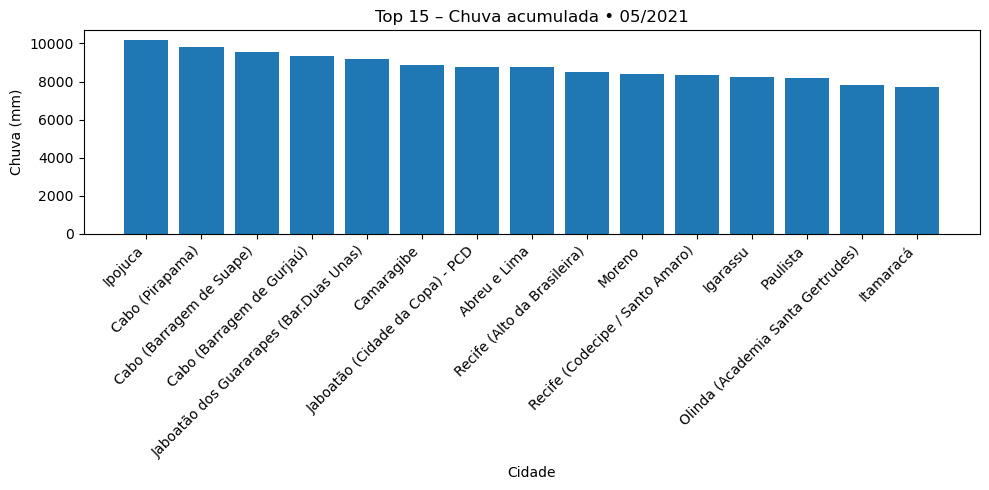

In [198]:
fig = plot_monthly_city_rainfall(data, "05/2021", top_n = 15)
plt.show()